# 1. Import data

In [36]:
import matplotlib as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')


df = pd.read_csv('../data/gedichtenGGD_STCN_Steur_stripped.csv', sep=';', index_col=0)
print(df.shape)

(3696, 31)


In [37]:
df.groupby('Database')['Database'].count()

Database
KB       3382
STCN      266
Steur      48
Name: Database, dtype: int64

In [38]:
df.columns

Index(['Database', 'Jaar', 'Bruidegom', 'Bruid', 'Bruidspaar', 'Drukker',
       'Plaats_druk', 'Plaats_huwelijk', 'Auteur1', 'Auteur2', 'Auteur3',
       'Auteur4', 'Auteur5', 'Auteur6', 'Auteur7', 'Auteur8', 'Auteur9',
       'Auteur10', 'Auteur11', 'Auteur12', 'Auteur13', 'Auteur14', 'Auteur15',
       'Auteur16', 'Auteur17', 'Auteur18', 'Auteur19', 'Auteur20', 'Auteur21',
       'Auteur22', 'Alleauteurs'],
      dtype='object')

In [39]:
df.isna().sum()

Database              0
Jaar                 17
Bruidegom             0
Bruid                 0
Bruidspaar            0
Drukker            1565
Plaats_druk        1572
Plaats_huwelijk     918
Auteur1             662
Auteur2            2203
Auteur3            2660
Auteur4            2993
Auteur5            3220
Auteur6            3364
Auteur7            3474
Auteur8            3549
Auteur9            3594
Auteur10           3639
Auteur11           3662
Auteur12           3675
Auteur13           3686
Auteur14           3689
Auteur15           3691
Auteur16           3695
Auteur17           3695
Auteur18           3695
Auteur19           3695
Auteur20           3695
Auteur21           3695
Auteur22           3695
Alleauteurs         662
dtype: int64

# 2. Authors

In [ ]:
#df['Alleauteurs'] = df[df.columns[8:30]].apply(
    #lambda x: ', '.join(x.dropna().astype(str)),
    #axis=1)

In [40]:
authors = df['Alleauteurs'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)

In [26]:
authors.to_csv('authors.csv', sep=';')

/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [41]:
authors.value_counts()

1      2591
2       443
3       171
4        83
5        54
6        52
7        30
8        18
10       14
9        13
12       11
13        7
14        7
11        6
16        6
15        5
21        5
17        4
27        3
33        3
19        3
18        2
26        2
28        2
20        1
22        1
65        1
73        1
38        1
42        1
102       1
108       1
114       1
61        1
79        1
25        1
43        1
47        1
49        1
167       1
dtype: int64

In [42]:
authors.sum(axis = 0, skipna = True)

7682

In [43]:
authors.count()

3551

In [44]:
df['n-authors'] = df.loc[:, 'Auteur1':'Auteur22'].count(axis=1)

In [46]:
df = df.rename(columns={'Jaar': 'year'})

In [48]:
df_authors_year = df[df['n-authors'] != 0]

In [49]:
n_authors_year = df_authors_year.groupby('year')['n-authors'].mean()

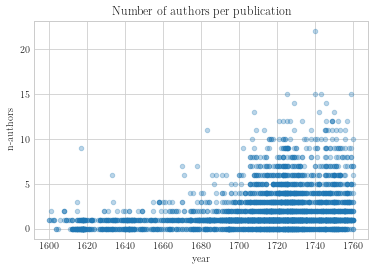

In [55]:
df.plot.scatter(x="year", y="n-authors", alpha=0.3)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.title('Number of authors per publication')
plt.savefig('n_authors.pdf')

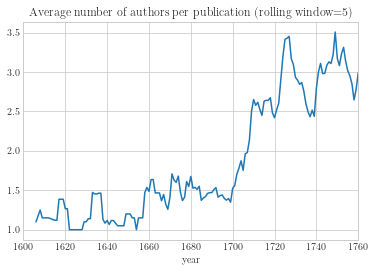

In [58]:
n_authors_year.rolling(window=5).mean().plot()
plt.title('Average number of authors per publication (rolling window=5)')
plt.savefig('n_authors_rolling_without_0.pdf')

# 3. Printers

In [59]:
printers = df.groupby('Drukker')['Drukker'].count().sort_values(ascending=False)

In [60]:
printers.to_csv('printers.csv', sep=';')

/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [61]:
printers.value_counts()

1      330
2      121
3       49
4       33
5       22
6       19
7       14
8       10
9        6
11       3
15       3
10       3
12       3
19       2
17       2
13       2
122      1
94       1
16       1
18       1
21       1
23       1
49       1
59       1
74       1
92       1
14       1
Name: Drukker, dtype: int64

# 4. Couples

In [62]:
couples = df.groupby('Bruidspaar')['Bruidspaar'].count().sort_values(ascending=False)

In [63]:
couples.sum(axis = 0, skipna = True)

3696

In [64]:
couples.count()

3302

In [65]:
couples.to_csv('couples.csv', sep='\t')

/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# 5. Searching for certain value

In [17]:
Geldorp = df[df['Alleauteurs'].str.contains("Geldorp", na=False)]

In [18]:
Geldorp.loc[Geldorp["Drukker"] == 'Geldorp']

,Database,Jaar,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,Auteur14,Auteur15,Auteur16,Auteur17,Auteur18,Auteur19,Auteur20,Auteur21,Auteur22,Alleauteurs
0,,,,,,,,,,,,,,,,,,,,,
994,KB,1700.0,Abraham Gryspaard,Susanna de Munnik,Abraham Gryspaard & Susanna de Munnik,Geldorp,Haarlem,Broek in Waterland,Jacob Storm,Kornelis Boon van Engelant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jacob Storm, Kornelis Boon van Engelant, Johan..."
996,KB,1703.0,Anthony Hoorens,Margareta Geldorp,Anthony Hoorens & Margareta Geldorp,Geldorp,Haarlem,Broek in Waterland,S. van Elsland,Jan Geldorp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"S. van Elsland, Jan Geldorp"
997,KB,1706.0,Pieter Decker,Johanna de Nys,Pieter Decker & Johanna de Nys,Geldorp,Haarlem,Rotterdam,Jan Geldorp,Jacob Storm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jan Geldorp, Jacob Storm, Willem van der Hoeven"
998,KB,1706.0,Willem van Reesema,Katharina Gryspeert,Willem van Reesema & Katharina Gryspeert,Geldorp,Haarlem,Asperen,Jacob Storm,Lucas Schermer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jacob Storm, Lucas Schermer, Petrus Castelein,..."
999,KB,1706.0,Abraham van den Bergh,Susanna van Arckel,Abraham van den Bergh & Susanna van Arckel,Geldorp,Haarlem,Amsterdam,Lucas Schermer,Jan Geldorp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lucas Schermer, Jan Geldorp"
1000,KB,1707.0,Dirk Velthaan,Agneta Hakkebort,Dirk Velthaan & Agneta Hakkebort,Geldorp,Haarlem,NaN,Lucas Schermer,Jan Geldorp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lucas Schermer, Jan Geldorp"
1001,KB,1707.0,Jan Popta,Susanna Hakkebort,Jan Popta & Susanna Hakkebort,Geldorp,Haarlem,NaN,Lucas Schermer,Jan Geldorp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lucas Schermer, Jan Geldorp"
1003,KB,1708.0,Jan Egels,Maria Snep,Jan Egels & Maria Snep,Geldorp,Haarlem,Amsterdam,Lucas Schermer,Jan Geldorp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lucas Schermer, Jan Geldorp"
1004,KB,1709.0,Jan van Pomeren,Hendrina Gryspeert,Jan van Pomeren & Hendrina Gryspeert,Geldorp,Haarlem,NaN,Evert Visscher,D. Bronsveldt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Evert Visscher, D. Bronsveldt, Jan Geldorp"


In [7]:
df.loc[df['nauthors'] == 22]

,Database,Jaar,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,Auteur15,Auteur16,Auteur17,Auteur18,Auteur19,Auteur20,Auteur21,Auteur22,Alleauteurs,nauthors
0,,,,,,,,,,,,,,,,,,,,,
3085,KB,1740.0,Josua van der Poorten,Hillegonda Josina van Eik,Josua van der Poorten & Hillegonda Josina van Eik,NaN,NaN,Sloterdijk,Justus van Maurik,Wilhem Suderman,...,Gerrit Blaaupot,Abraham Suderman,Dirk Willink,Matthijs Straalman,E.C.,Frans van Steenwyk,Abraham de (1707-1748) Haen,F.B.S.,"Justus van Maurik, Wilhem Suderman, Pieter van...",22


In [8]:
df[(df.Database =='STCN') & (df.nauthors == 0)]

,Database,Jaar,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,Auteur15,Auteur16,Auteur17,Auteur18,Auteur19,Auteur20,Auteur21,Auteur22,Alleauteurs,nauthors
0,,,,,,,,,,,,,,,,,,,,,
3406,STCN,1605.0,Abraham van der Voort,Elisabet Rekenaer,Abraham van der Voort & Elisabet Rekenaer,NaN,Leiden,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3668,STCN,1615.0,Willem Luyt Kittensteyn,Maria Lambrechts Cocqus,Willem Luyt Kittensteyn & Maria Lambrechts Cocqus,Jan Andriesz Cloeting,Delft,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3669,STCN,1617.0,Jacob Danielsz. De Bergh,Anna Floris dochter,Jacob Danielsz. De Bergh & Anna Floris dochter,Jan Andriesz Cloeting,Delft,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3695,STCN,1618.0,Steven Doensz. Groenendijck,Annetgen Pieters de Lange,Steven Doensz. Groenendijck & Annetgen Pieters...,Jasper Tournay,Gouda,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3670,STCN,1621.0,Antonis Pietersz van Dieningen,Mayken Daniels de Bergh,Antonis Pietersz van Dieningen & Mayken Daniel...,Jan Andriesz Cloeting,Delft,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3628,STCN,1627.0,Cornelis van Swanenburch,Cecilia van der Gracht,Cornelis van Swanenburch & Cecilia van der Gracht,Jan Jacobsz Paets,Leiden,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3527,STCN,1628.0,Dirck Jansen de Hoogh,Maria Goverts Knol,Dirck Jansen de Hoogh & Maria Goverts Knol,Harmen Jansz (erven) Muller,Amsterdam,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3689,STCN,1641.0,Adriaen Imertsen,Ienneken Rinck,Adriaen Imertsen & Ienneken Rinck,Jan van (V) Turnhout,s-Hertogenbosch,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3684,STCN,1642.0,Adriaen de Riick,Maria Walckier,Adriaen de Riick & Maria Walckier,Jan Jansz van Dorp,Leiden,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# 6. Calculate publications by year

In [7]:
df_year = df[(df['Jaar'] >= 1600)
& (df['Jaar'] <= 1700)]

In [8]:
df_year.shape

(977, 31)

In [66]:
years = df.groupby('year')['year'].count()

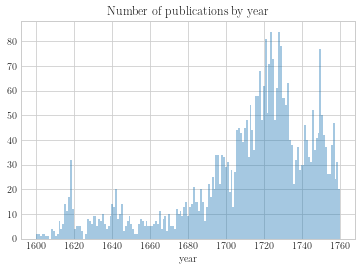

In [70]:
sns.distplot(df['year'], kde=False, bins=161)
plt.title('Number of publications by year')
plt.savefig('histyear.pdf')

In [71]:
df.shape

(3696, 32)

In [11]:
df_year.shape

(3679, 31)

In [109]:
years.to_csv('years.csv', sep='\t')

/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# 7. Name connections

## 7.1 Split first name and last name

In [72]:
df[['firstname_bride', 'lastname_bride']] = df.Bruid.str.rsplit(' ', 1, expand=True)
df[['firstname_groom', 'lastname_groom']] = df.Bruidegom.str.rsplit(' ', 1, expand=True)
df[['firstname_printer', 'lastname_printer']] = df.Drukker.str.rsplit(' ', 1, expand=True)

## 7.2 Create boolean for name connection

In [73]:
df['bride_authors'] = df.fillna('').apply(lambda row: row['lastname_bride'] in row['Alleauteurs'], axis=1)
df['groom_authors'] = df.fillna('').apply(lambda row: row['lastname_groom'] in row['Alleauteurs'], axis=1)
df['bride_printer'] = df.fillna('').apply(lambda row: row['lastname_bride'] in row['Drukker'], axis=1)
df['groom_printer'] = df.fillna('').apply(lambda row: row['lastname_groom'] in row['Drukker'], axis=1)
df['Printer_authors'] = df.fillna('').apply(lambda row: row['Drukker'] in row['Alleauteurs'], axis=1)
df['lastnameprinter_authors'] = df.fillna('').apply(lambda row: row['lastname_printer'] in row['Alleauteurs'], axis=1)

### 7.2.1 Results (NaN included)

In [74]:
print(df.groupby('bride_authors')['bride_authors'].count())
print(df.groupby('groom_authors')['groom_authors'].count())
print(df.groupby('bride_printer')['bride_printer'].count())
print(df.groupby('groom_printer')['groom_printer'].count())
print(df.groupby('Printer_authors')['Printer_authors'].count())
print(df.groupby('lastnameprinter_authors')['lastnameprinter_authors'].count())

bride_authors
False    3273
True      423
Name: bride_authors, dtype: int64
groom_authors
False    3145
True      551
Name: groom_authors, dtype: int64
bride_printer
False    3680
True       16
Name: bride_printer, dtype: int64
groom_printer
False    3672
True       24
Name: groom_printer, dtype: int64
Printer_authors
False    1780
True     1916
Name: Printer_authors, dtype: int64
lastnameprinter_authors
False    1486
True     2210
Name: lastnameprinter_authors, dtype: int64


### 7.2.2 Results (NaN excluded)

In [75]:
df1 = df[df['Printer_authors']==True]
df1_sum = df1.groupby('Drukker')['Drukker'].count().sort_values(ascending=False)
df1_sum.sum()

351

In [76]:
df1_sum

Drukker
Johannes van Oosterwyk    94
Hendrik van de Gaete      53
Lescailje                 34
Joannes van Braam         17
Geldorp                   12
                          ..
Jacob Jansz Paets          1
Jacob Bolt                 1
Willem Boot                1
Izaak Duim                 1
Izaak van der Vinne        1
Name: Drukker, Length: 75, dtype: int64

In [77]:
df2 = df[df['lastnameprinter_authors']==True]
df2_sum = df2.groupby('lastname_printer')['lastname_printer'].count().sort_values(ascending=False)
df2_sum.sum()

357

In [78]:
df2_sum

lastname_printer
Oosterwyk       95
Gaete           53
Braam           17
Visscher        13
Willis          12
                ..
Huyssteen        1
Houten           1
Hoogstraeten     1
Haan             1
Adelhoorn        1
Name: lastname_printer, Length: 83, dtype: int64

## 7.3 Calculate number of name connections

In [79]:
df['bride_authors_count'] = df.fillna('').apply(lambda row: row['Alleauteurs'].count(row['lastname_bride']), axis=1)
df['groom_authors_count'] = df.fillna('').apply(lambda row: row['Alleauteurs'].count(row['lastname_groom']), axis=1)

### 7.3.1 Bride versus authors

In [80]:
df3 = df[df['bride_authors']==True]
df3.groupby('bride_authors_count')['bride_authors_count'].count()

bride_authors_count
1    328
2     81
3     11
4      3
Name: bride_authors_count, dtype: int64

In [81]:
df.groupby('lastname_bride')['bride_authors_count'].sum().sort_values(ascending=False)

lastname_bride
Bruyn          9
Sart           8
Burlett        7
Veen           6
Driest         6
              ..
Oudenstein     0
Oudensteyn     0
Ouderkerk      0
Oudshoorn      0
's-Graefweg    0
Name: bride_authors_count, Length: 2219, dtype: int64

In [82]:
df3.loc[df3['lastname_bride'] == 'Burlett']

,Database,year,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,firstname_printer,lastname_printer,bride_authors,groom_authors,bride_printer,groom_printer,Printer_authors,lastnameprinter_authors,bride_authors_count,groom_authors_count
0,,,,,,,,,,,,,,,,,,,,,
1154,KB,1742.0,Simon Tetterode,Johanna Margareta de Burlett,Simon Tetterode & Johanna Margareta de Burlett,Mozes van Hulkenroy,Haarlem,NaN,J. Hoepeling,Everard de Burlett,...,Mozes van,Hulkenroy,True,False,False,False,False,False,3,0
1203,KB,1759.0,Marcus Tim,Maria de Burlett,Marcus Tim & Maria de Burlett,Fredrik de Kruyff,Amsterdam,Groningen,Adriana Jacoba de Burlett,de Burlett,...,Fredrik de,Kruyff,True,True,False,False,False,False,4,1


In [83]:
s1 = df3.groupby('lastname_bride')['lastname_bride'].count()

### 7.3.2 Groom versus authors

In [84]:
df4 = df[df['groom_authors']==True]
df4.groupby('groom_authors_count')['groom_authors_count'].count()

groom_authors_count
1    408
2     85
3     27
4     19
5      8
6      2
7      1
8      1
Name: groom_authors_count, dtype: int64

In [85]:
df.groupby('lastname_groom')['groom_authors_count'].sum().sort_values(ascending=False)

lastname_groom
Issendorp      20
Kinderen       14
Beukelaar      13
Andriessen      8
Bosch           8
               ..
Oosterbaan      0
Oosterling      0
Oosterwyck      0
Oosterwyk       0
(1615-1651)     0
Name: groom_authors_count, Length: 2202, dtype: int64

In [86]:
df4.loc[df4['lastname_groom'] == 'Beukelaar']

,Database,Jaar,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,firstname_printer,lastname_printer,bride_authors,groom_authors,bride_printer,groom_printer,Printer_authors,lastnameprinter_authors,bride_authors_count,groom_authors_count
0,,,,,,,,,,,,,,,,,,,,,
2183,KB,1728.0,Willem Beukelaar,Elisabeth Snappers,Willem Beukelaar & Elisabeth Snappers,NaN,NaN,Rotterdam,Isaak Beukelaar,Daniël Adrianus Beukelaar,...,NaN,NaN,False,True,False,False,True,True,0,8
2189,KB,1730.0,Isaak Beukelaar,Cornelia Snappers,Isaak Beukelaar & Cornelia Snappers,NaN,NaN,NaN,Claas Bruin,Hermanus van den Burg,...,NaN,NaN,False,True,False,False,True,True,0,5


In [86]:
s2 = df4.groupby('lastname_groom')['lastname_groom'].count()

In [87]:
s1.add(s2)

Aalst        NaN
Abels        NaN
Adelhoorn    NaN
Adriani      NaN
Alberthoma   NaN
              ..
Wys          NaN
Wythoff      NaN
Zee          NaN
Zoutman      NaN
Zutterman    NaN
Length: 677, dtype: float64

### 7.3.3 Couples versus authors

In [88]:
df4['couple_name'] = df4.fillna('').apply(lambda row: row['lastname_groom'].count(row['lastname_bride']), axis=1)

/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
df4.groupby('couple_name')['couple_name'].count()

couple_name
0    543
1      8
Name: couple_name, dtype: int64

In [90]:
df4.loc[df4['couple_name'] == 1]

,Database,year,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,lastname_printer,bride_authors,groom_authors,bride_printer,groom_printer,Printer_authors,lastnameprinter_authors,bride_authors_count,groom_authors_count,couple_name
0,,,,,,,,,,,,,,,,,,,,,
1679,KB,1706.0,Jan Abraham Willink,Hillegonda Willink,Jan Abraham Willink & Hillegonda Willink,Jan Rieuwertsz,Amsterdam,Dordrecht,Jakob Huisduinen,Daniel Willink,...,Rieuwertsz,True,True,False,False,False,False,1,1,1
961,KB,1714.0,Michiel Bruynvis,Anna Bruynvis,Michiel Bruynvis & Anna Bruynvis,Hendrik van de Gaete,Amsterdam,NaN,Hendrik van de Gaete,Ysbrand Ysbrandsz Vincent,...,Gaete,True,True,False,False,True,True,1,1,1
158,KB,1729.0,Jan Izaaksz van den Bogaerd,Magdalena Maria van den Bogaerd,Jan Izaaksz van den Bogaerd & Magdalena Maria ...,Verbeek,Leiden,Amsterdam,Cornelis Izaaksz van den Bogaerd,J.V.M.,...,None,True,True,False,False,False,True,1,1,1
660,KB,1730.0,Hendrik Hoffham,Geertruyd Hoffham,Hendrik Hoffham & Geertruyd Hoffham,Gerrit Bouman,Amsterdam,Amsterdam,Gerard Hoffham,P. Hoffham,...,Bouman,True,True,False,False,False,False,2,2,1
3208,KB,1748.0,Lucas Bols,Sara Zophia Bols,Lucas Bols & Sara Zophia Bols,NaN,NaN,Groningen,C. Bols,J. Bols,...,NaN,True,True,False,False,True,True,3,3,1
479,KB,1751.0,Jan Alting,Swana Francina Alting,Jan Alting & Swana Francina Alting,NaN,NaN,Delft,Lucas Trip,Bernhardus Alting,...,NaN,True,True,False,False,True,True,1,1,1
1051,KB,1757.0,Izaak Du Sart,Helena Du Sart,Izaak Du Sart & Helena Du Sart,Jacobus Haffman,Amsterdam,Amsterdam,R.D.B.,Izaak (Jr) Du Sart,...,Haffman,True,True,False,False,False,False,3,3,1
703,KB,NaN,Daam van Leuve,Sara van Leuve,Daam van Leuve & Sara van Leuve,Arentsz,Amsterdam,Amsterdam,Roeland van Leuve,NaN,...,None,True,True,False,False,False,True,1,1,1


### 7.3.4 Printer versus author

In [91]:
df3 = df[df['Printer_authors']==True]
df3.groupby('Drukker')['Drukker'].count().sort_values(ascending=False)

Drukker
Johannes van Oosterwyk    94
Hendrik van de Gaete      53
Lescailje                 34
Joannes van Braam         17
Geldorp                   12
                          ..
Jacob Jansz Paets          1
Jacob Bolt                 1
Willem Boot                1
Izaak Duim                 1
Izaak van der Vinne        1
Name: Drukker, Length: 75, dtype: int64

### 7.3.5 Groom versus printer

In [92]:
df5 = df[df['groom_printer']==True]
df5.groupby('lastname_groom')['lastname_groom'].count().sort_values(ascending=False)

lastname_groom
Groot         2
Elzevier      1
Aertsz        1
Bos           1
Broen         1
Bruyn         1
Casteleyn     1
Castricum     1
Commelin      1
Damme         1
Duim          1
Willis        1
Wetstein      1
Hackius       1
Heuvel        1
Hulkenroy     1
Klinkhamer    1
Leeuwen       1
Poolsum       1
Ribbius       1
Scheltus      1
Schouten      1
Aardenberg    1
Name: lastname_groom, dtype: int64

### 7.3.6 Bride versus printer

In [93]:
df6 = df[df['bride_printer']==True]
df6.groupby('lastname_bride')['lastname_bride'].count().sort_values(ascending=False)

lastname_bride
Scheltus      2
Oosterwyk     2
Groot         2
Wetstein      1
Visch         1
Rieuwertsz    1
Ribbius       1
Ravesteyn     1
Marcus        1
Geldorp       1
Damme         1
Broers        1
Bergh         1
Name: lastname_bride, dtype: int64

# Overig

In [95]:
df7 = df.groupby(['year', 'Bruidspaar'])['Bruidspaar'].count().sort_values(ascending=False)

In [96]:
df7

year    Bruidspaar                                                     
1756.0  Lieve Geelvinck (1730-1757) & Catharina Elisabeth Hasselaer        5
1753.0  Joan Frederik d' Orville & Maria Philippina Schryver               5
1728.0  Jan Six (1668-1750) & Anna Elisabeth van den Bempden               5
1750.0  Christian Scholten van Aschat & Johanna Catharina van Wesele       5
1718.0  Herman Vingerhoedt (1697-1762) & Johanna Ignatia van der Hoeven    4
                                                                          ..
1728.0  Nanning van Foreest & Jacoba de Vries                              1
        Nanning Kromhout & Cornelia Chevyn                                 1
        Mynard van Nuld & Cornelia Raillard                                1
        Lucas Merens & Eva Maria van Foreest                               1
1721.0  Christiaan van Boneval & Anna Doornekroon                          1
Name: Bruidspaar, Length: 3329, dtype: int64

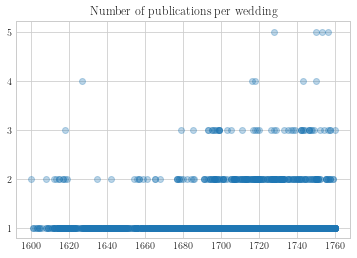

In [99]:
import numpy as np
plt.scatter(x=df7.index.get_level_values(0), y=df7.values, alpha=0.3)
plt.yticks(np.arange(1, 6, step=1))
plt.title('Number of publications per wedding')
plt.savefig('n_publications_wedding.pdf')

### Network

In [100]:
toptienauteurs = ['Claas Bruin', 'Anthony Jansen', 'Pieter Langendyk', 'Johannes van Oosterwyk', 'Jan Baptista Wellekens', 'Willem van der Hoeven', 'Hendrik van de Gaete', 'David van Hoogstraten', 'Hendrik Snakenburg', 'Gijsbert Tysens']
toptiendrukkers = ['Johannes van Oosterwyk', 'Lescailje', 'Boeteman', 'Hendrik van de Gaete', 'Theodorus Crajenschot', 'Paulus Aertsz van Ravesteyn', 'Geldorp', 'De Broen', 'Goeree', 'Willem Barents']

In [101]:
network1 = df[df['Alleauteurs'].str.contains('|'.join(toptienauteurs), na=False)]

In [102]:
network2 = df[df['Drukker'].str.contains('|'.join(toptiendrukkers), na=False)]

In [103]:
network = pd.concat([network1, network2]).drop_duplicates() 

In [104]:
network.shape

(895, 46)

In [105]:
network.to_csv('network.csv', sep=';')